In [1]:
import sys
print(sys.executable)
!pip install opencv-python
!pip install matplotlib

C:\Users\Bryan\anaconda3\python.exe


In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [8]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [9]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

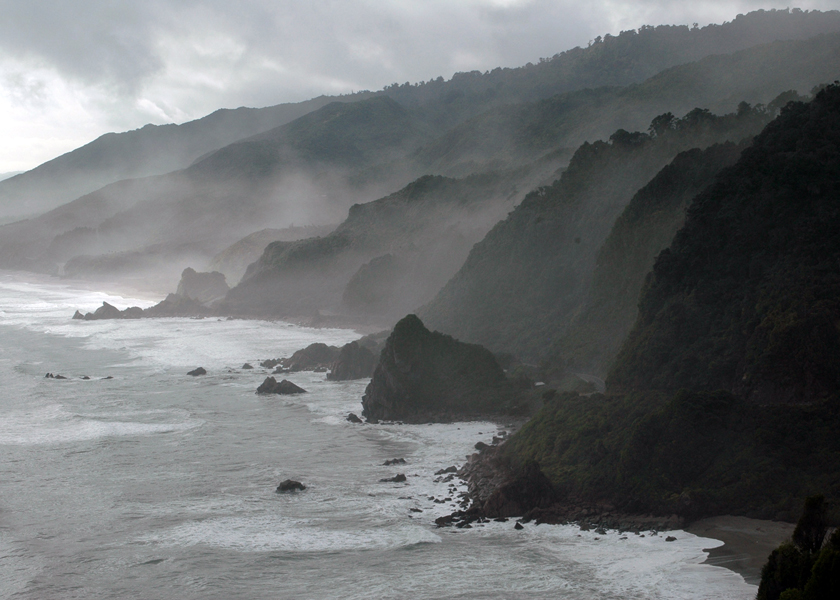

In [10]:
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
Image(filename="New_Zealand_Coast.jpg")

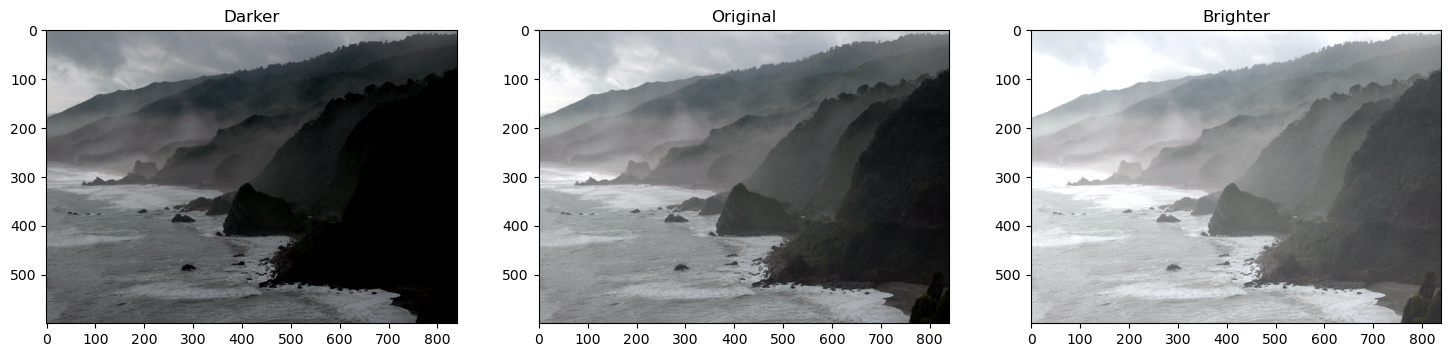

In [11]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50
img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

(572, 800)


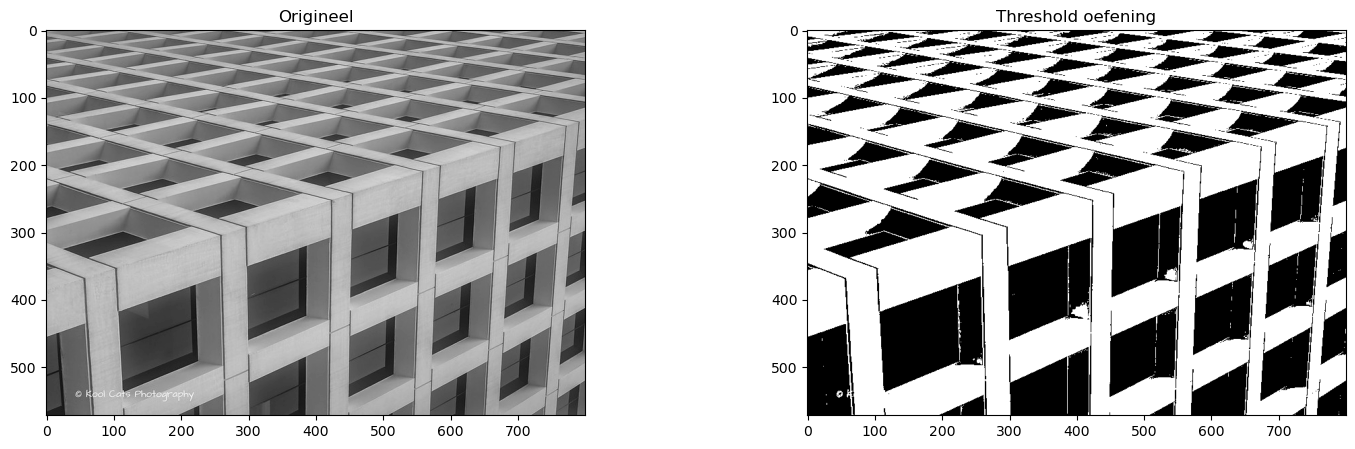

In [17]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
#alle pixels met waarden onder 120 worden zwart en pixels met waarden boven 255 worden wit
retval, img_thresh = cv2.threshold(img_read, 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Origineel")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Threshold oefening")

print(img_thresh.shape)

(200, 499)


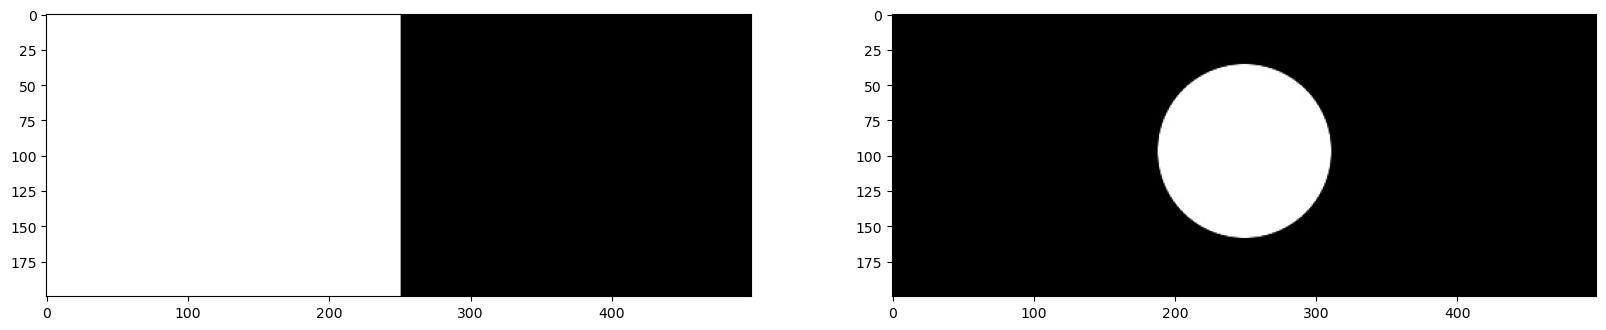

In [18]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

In [ ]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")